<a href="https://colab.research.google.com/github/Krishks369/diamonds/blob/main/notebooks/Diamonds_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports


In [29]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

Uploading dataset

In [30]:
url = "https://raw.githubusercontent.com/Krishks369/diamonds/main/data/diamonds.csv"
d =pd.read_csv(url)
d.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [31]:
d.shape

(53940, 11)

In [32]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [33]:
d = d.drop(["Unnamed: 0"], axis=1)
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [34]:
d.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


deleting dimensionless diamonds

In [35]:
d = d.drop(d[d["x"]==0].index)
d = d.drop(d[d["y"]==0].index)
d = d.drop(d[d["z"]==0].index)
d.shape

(53920, 10)

Excluding to outliers

Text(0.5, 1.0, "Regression Line on Price vs 'y'")

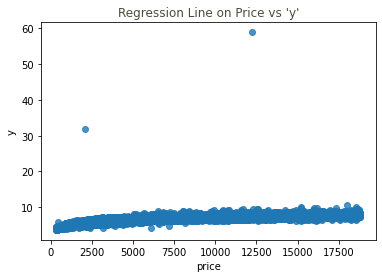

In [36]:
ax = sns.regplot(x="price", y="y", data=d, fit_reg=True)
ax.set_title("Regression Line on Price vs 'y'", color="#4e4c39")

Text(0.5, 1.0, 'Regression Line on Price vs Table')

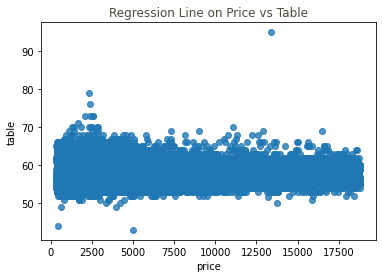

In [37]:
ax=sns.regplot(x="price", y="table", data=d , fit_reg=True)
ax.set_title("Regression Line on Price vs Table", color="#4e4c39")

In [38]:
d = d[(d['depth']<75)&(d['depth']>45)]
d= d[(d['table']<80)&(d['table']>40)]
d = d[(d['x']<30)]
d = d[(d['y']<30)]
d = d[(d['x']<30)]
d.shape

(53911, 10)

CHECKING FOR CATEGORICAL DATA AND TRANSFORMING

In [39]:
s = (d.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [40]:
label_data = d.copy()

label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [41]:
d.describe()

,carat,depth,table,price,x,y,z
count,53911.000000,53911.000000,53911.000000,53911.000000,53911.000000,53911.000000,53911.000000
mean,0.797653,61.749704,57.455798,3930.786277,5.731529,5.733358,3.539842
std,0.473768,1.420083,2.226162,3987.210862,1.119396,1.111266,0.702233
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.500000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,31.800000


MODEL BUILDING

In [42]:
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=8)

In [43]:
from sklearn import linear_model

In [44]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred_train = model.predict(X_train)
from sklearn.metrics import r2_score

Perediction on train set

In [46]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_train, y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_train, y_pred_train))

Coefficients: [11342.41495209    56.63628177  -266.72645707   282.03292284
  -148.69570618   -87.82179772 -3148.8654281   1942.13793422
  -124.77627459]
Intercept: 15929.275296108937
Mean squared error (MSE): 1778976.17
Coefficient of determination (R^2): 0.89


Prediction on test set

In [47]:
y_pred_test = model.predict(X_test)

In [48]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred_test))

Coefficients: [11342.41495209    56.63628177  -266.72645707   282.03292284
  -148.69570618   -87.82179772 -3148.8654281   1942.13793422
  -124.77627459]
Intercept: 15929.275296108937
Mean squared error (MSE): 1893901.70
Coefficient of determination (R^2): 0.88


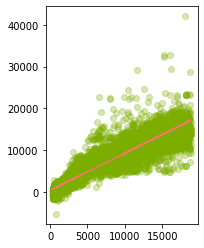

In [49]:
plt.subplot(1, 2, 1)
plt.scatter(x=y_train, y=y_pred_train, c="#7CAE00", alpha=0.3)


z = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")

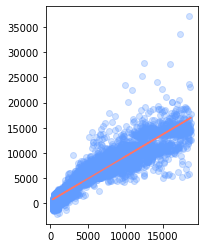

In [50]:
plt.subplot(1, 2, 2)
plt.scatter(x=y_test, y=y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(y_test, y_pred_test, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")